# Krystian Gronek & Katarzyna Piotrowska
# Text Mining and Social Media Mining, final project - Analyzing men and women comments using NLP methods

# Loading packages

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from nltk.tokenize import word_tokenize # tokenization
nltk.download('punkt')
from nltk.corpus import stopwords # stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.stem import PorterStemmer # stemming
ps = PorterStemmer() 

nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loading raw data and initial cleaning

In [2]:
men = pd.read_csv('data/askmen.csv', sep = ';')
women = pd.read_csv('data/askwomen.csv', sep = ';')

In [3]:
men

,username,comment_score,comment_text,submission_title,submission_ups,submission_downs
0,virusamongus,942,"Oh no, I was so interested in the nuanced deba...",BONK! Overly sexual questions are no longer al...,13949,0
1,CoffeeEnjoyerFrog,4172,"Can't wait to see : men, what gets you at 25% ...",BONK! Overly sexual questions are no longer al...,13949,0
2,5altyShoe,4326,Looks like someone got some post ~~nut~~ legum...,BONK! Overly sexual questions are no longer al...,13949,0
3,mightyjake,1876,> remember to read the Bible\n\nEzekiel 23:20\...,BONK! Overly sexual questions are no longer al...,13949,0
4,TallCombination6,764,How am I supposed to know that men enjoy blowj...,BONK! Overly sexual questions are no longer al...,13949,0
...,...,...,...,...,...,...
17275,randylahey2883,3,I had a bear come into my camp on more than on...,What is a fact or story you don't get to tell ...,9,0
17276,BalloonPilotDude,3,A story that I think about allot but I doubt t...,What is a fact or story you don't get to tell ...,9,0
17277,JetBrink,3,I'm awesome in bed,What is a fact or story you don't get to tell ...,9,0
17278,Stabbmaster,9,The first slaveowner in the United States was ...,What is a fact or story you don't get to tell ...,9,0


In [4]:
women

,username,comment_score,comment_text,submission_title,submission_ups,submission_downs
0,shockedpikachu123,28,Waiting for the cvs candy to be 75% off on Feb...,Valentines Day Mega thread! Check in here for ...,100,0
1,secrethedgehog5,16,"My second valentines day alone, and i am feeli...",Valentines Day Mega thread! Check in here for ...,100,0
2,KBXGazelle,15,February 14 was my mom's birthday so I usually...,Valentines Day Mega thread! Check in here for ...,100,0
3,meloaf,13,I'm sending all my friends Valentine's Day car...,Valentines Day Mega thread! Check in here for ...,100,0
4,OriginalOestrus,12,I have reservations at my favorite steakhouse!...,Valentines Day Mega thread! Check in here for ...,100,0
...,...,...,...,...,...,...
16851,CutWeary9135,1,12,What age do you consider to be “in your prime”?,373,0
16852,Irinakusx,1,20 it is advisable to take care of your health...,What age do you consider to be “in your prime”?,373,0
16853,NaN,1,[removed],What age do you consider to be “in your prime”?,373,0
16854,cuddliest_friend,1,If i feel that this is the Part of my Life whe...,What age do you consider to be “in your prime”?,373,0


In [5]:
print(men['submission_downs'].unique())
print(women['submission_downs'].unique())

[0]
[0]


We should delete 'submission_downs' column as it is only 0. It doesn't mean that reddit doesn't allow to scrape the number of downvotes (equivalent of dislikes on facebook) of a post but rather that people who are disinterested in topic just scroll through it and do not downvote it and when they are interested they obiously upvote (equivalent of likes on facebook) the submission post.

In [6]:
men = men.drop(columns = "submission_downs")
women = women.drop(columns = "submission_downs")

We need to check for comments removed by moderators. They can be seen in dataset as '[removed]' strings.

In [7]:
men['comment_text'].loc[men['comment_text'] == "[removed]"]
women['comment_text'].loc[women['comment_text'] == "[removed]"]

338      [removed]
720      [removed]
4943     [removed]
6676     [removed]
10034    [removed]
12665    [removed]
12872    [removed]
12904    [removed]
13351    [removed]
13394    [removed]
14807    [removed]
15123    [removed]
15593    [removed]
16142    [removed]
Name: comment_text, dtype: object

34       [removed]
47       [removed]
48       [removed]
49       [removed]
50       [removed]
           ...    
16841    [removed]
16842    [removed]
16845    [removed]
16853    [removed]
16855    [removed]
Name: comment_text, Length: 1277, dtype: object

We need to remove comments removed by moderators on reddit. What's important to note here is that in this sample (which was the 500 'hot' posts the day of scraping of data) there were as much as 1277 comments removed in /r/AskWomen subreddit while there were only 14 comments removed in /r/AskMen. This could mean multitude of things, for example strickter and more meticulous moderation on /r/AskWomen subreddit or bigger prevelance of reddit 'trolls' (user who malicously comment in order to induce negative emotions in other commenters) that needed to be banned.

In [8]:
# List of comments text that need to be removed
wrong_comments = ['[removed]']

# remove '[removed]' comments
men = men[men['comment_text'].isin(wrong_comments) == False]
women = women[women['comment_text'].isin(wrong_comments) == False]

# check if all '[removed]' comments were removed
women['comment_text'].loc[women['comment_text'] == "[removed]"]
men['comment_text'].loc[men['comment_text'] == "[removed]"]

Series([], Name: comment_text, dtype: object)

Series([], Name: comment_text, dtype: object)

It should also remove any comments for which the correspoding username is not a string (is a only number or there is no username given) 

In [9]:
# removing rows in men dataset with usernames that are not strings
men = men.loc[men.username.apply(lambda x: not isinstance(x, (float, int)))]

# removing rows in women dataset with usernames that are not strings
women = women.loc[women.username.apply(lambda x: not isinstance(x, (float, int)))]

It should also be checked weather the username contains 'bot' substring and delete such comments as they can be submitted by bots (created by other reddit users to auto submit comment responses to other users comments or posts), which we do not want. For that function ```check_if_bot(usernames)``` is constructed below along with the code needed to clean the data.

In [10]:
def check_if_bot(usernames):
    output = list()
    for i in usernames:
        if re.compile(r'bot').search(i.lower()):
            output.append(1)
        else:
            output.append(0)
    return output

In [11]:
# checking usernames and removing comments that have 'bot' keyword
men_usernames = men.drop(columns = ['comment_text', 'comment_score', 'submission_title', 'submission_ups'])["username"]
women_usernames = women.drop(columns = ['comment_text', 'comment_score', 'submission_title', 'submission_ups'])["username"]

men_usernames_checked = check_if_bot(men_usernames)
women_usernames_checked = check_if_bot(women_usernames)

men['usr_check'] = men_usernames_checked
women['usr_check'] = women_usernames_checked

# comments that are made by users with 'bot' substring in their name
men[['username', 'comment_text']].loc[men.usr_check == 1]
women[['username', 'comment_text']].loc[women.usr_check == 1]

# delete those comments
men = men[men.usr_check != 1]
women = women[women.usr_check != 1]

# drop check column
men = men.drop(columns = 'usr_check')
women = women.drop(columns = 'usr_check')

,username,comment_text
728,Sebbot,If you don’t have a dishwasher: 2 sets of ever...
2765,jimboTRON261,No matter ‘what happened next’ for everyone wh...
2840,CakeRobot365,She typically starts having sex with someone else
3269,plasticbots,Helicopter
4152,robothobbes,These posts are making me feel normal. Glad to...
4584,BigBottySlayer,I just got a gf... \nIf she get's bored of me...
5662,BigBottySlayer,Push them up from your thighs and stuff a part...
5676,weavebot,If you think you can do that and not get sucke...
5749,Cotterbot,Delete that shit. Don’t keep nudes of exes. Ha...
5781,MannyBothans_15,If you marry a woman who won't let you look at...


,username,comment_text
277,roboticvalkyrie,"Great question. Basically, any word topic whic..."
716,Both_Association_258,Loving myself again
1397,Bottle_Sweaty,"While the doctor was breaking my water, husban..."
1466,sarbot88,He didn’t say anything ridiculous but he could...
1594,Both_Association_258,"Sometimes I don't know, \nI have always been a..."
1720,Robotro17,Depend on the day. Somedays I feel cute. Somed...
2822,almafinklebottom,I'm scared work will stop and I won't be able ...
3700,Fariesinabottle,Puberty so I would finally have boobies. I hav...
4691,Trishbot,Pineapple does belong on pizza.
5481,sarbot88,"Black hair and fair skin, apparently that’s un..."


The comments written by users that had 'bot' in their name do not seem to be generated by a bots by just in case they are still removed. None of the non-desired comments are now present in datasets

# Text preprocessing using regular expressions and assembling final datasets

Below we can see the regular expression patterns that are needed for further data cleaning. Along with that there were written functions that perform such preprocessing techniques as lower casing, tokenization, stop word removal or stemming of the text data.

In [12]:
DELETE_LINKS = re.compile(r"(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))")
DELETE_USER_MENTIONS = re.compile("u\/\w+")
DELETE_SUBREDDIT_MENTIONS = re.compile("(r/\w+|/r/\w+)")
REPLACE_NO_SPACE = re.compile("[.@;:!\'?,\"-/()\[\]<>~’]")
REPLACE_WITH_SPACE = re.compile("(\\n\\n)|(\\n)")
MULTIPLE_SPACES = re.compile("\s+")
LEADING_SPACES = re.compile("^\s+")
NUMBERS = re.compile("[0-9]+")
EMOJIS = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                 # dingbats
        u"\u3030"
        "]+", flags = re.UNICODE)
FINAL_CLEANING = re.compile('[^a-zA-Z0-9]')

In [13]:
# Preprocessing for sentiment analysis
def preprocess_text(text):
    text = [DELETE_LINKS.sub('', line) for line in text]
    text = [DELETE_USER_MENTIONS.sub('', line) for line in text]
    text = [DELETE_SUBREDDIT_MENTIONS.sub('', line) for line in text]
    text = [REPLACE_WITH_SPACE.sub(' ', line) for line in text]
    text = [REPLACE_NO_SPACE.sub('', line) for line in text]
    text = [NUMBERS.sub('', line) for line in text]
    text = [EMOJIS.sub('', line) for line in text]
    text = [line.lower() for line in text]
    text = [FINAL_CLEANING.sub(' ', line) for line in text]
    text = [MULTIPLE_SPACES.sub(' ', line) for line in text]
    text = [LEADING_SPACES.sub('', line) for line in text]
    return text

def tokenization(text):
    text_vectors = [word_tokenize(line) for line in text]
    return text_vectors

def stop_words_removal(text):
    text = [line.lower() for line in text] # makes text lower case
    tokenized = tokenization(text)
    filtered_sentences = list()
    for line in tokenized:
        filtered_line = [word for word in line if not word in stop_words]
        filtered_sentences.append(filtered_line)
    text = [' '.join(line) for line in filtered_sentences]
    return text

def custom_stop_words_removal(text, stop_words_list):
    tokenized = tokenization(text)
    filtered_sentences = list()
    for line in tokenized:
        filtered_line = [word for word in line if not word in stop_words_list]
        filtered_sentences.append(filtered_line)
    text = [' '.join(line) for line in filtered_sentences]
    return text

def stemming(text):
    tokenized = tokenization(text)
    filtered_sentences = list()
    for line in tokenized:
        filtered_line = [ps.stem(word) for word in line]
        filtered_sentences.append(filtered_line)
    text = [' '.join(line) for line in filtered_sentences]
    return text

## Final "men" dataset

In [14]:
men.head(2)

,username,comment_score,comment_text,submission_title,submission_ups
0,virusamongus,942,"Oh no, I was so interested in the nuanced deba...",BONK! Overly sexual questions are no longer al...,13949
1,CoffeeEnjoyerFrog,4172,"Can't wait to see : men, what gets you at 25% ...",BONK! Overly sexual questions are no longer al...,13949


In [15]:
# men comments data preprocessing
men_com = men.drop(columns = ['username', 'comment_score', 'submission_title', 'submission_ups'])["comment_text"]
men_com = preprocess_text(men_com)
men_stw = stop_words_removal(men_com)
men_tok = tokenization(men_com)
men_stm = stemming(men_stw) # with stop words (stw) removed
men_tok_stw = tokenization(stop_words_removal(men_com)) # with stop words (stw) removed

# /r/AskMen submissions preprocessing
men_posts = men.drop(columns = ['username', 'comment_score', 'comment_text', 'submission_ups'])["submission_title"]
men_posts = preprocess_text(men_posts)
men_posts_stw = stop_words_removal(men_posts)
men_posts_tok = tokenization(men_posts)
men_posts_stm = stemming(stop_words_removal(men_posts)) # with stop words (stw) removed
men_posts_tok_stw = tokenization(stop_words_removal(men_posts)) # with stop words (stw) removed

In [16]:
# Assembling men2 dataset
men2 = men[['username']].copy()
men2['com_original'] = men[['comment_text']].copy()

# comments preprocesses
men2['cleaned'] = men_com
men2['cleaned_wo_sw'] = men_stw # comments with stop words removed
men2['tokenized'] = men_tok
men2['stemmed'] = men_stm
men2['tokenized_wo_sw'] = men_tok_stw

# posts preprocesses
men2['submission_title'] = men['submission_title']
men2['submission_title_cleaned'] = men_posts
men2['submission_title_cleaned_wo_sw'] = men_posts_stw
men2['submission_title_tokenized'] = men_posts_tok
men2['submission_title_stemmed'] = men_posts_stm
men2['submission_title_tokenized_wo_sw'] = men_posts_tok_stw

# Adding numerical variables
men2['comment_score'] = men['comment_score']
men2['submission_ups'] = men['submission_ups']

# adding remaining variables (submission post names and numerical variables)

# removing rows with empty cleaned comments
men2 = men2[men2.cleaned != '']
men2 = men2[men2.cleaned_wo_sw != '']

men2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17004 entries, 0 to 17279
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   username                          17004 non-null  object
 1   com_original                      17004 non-null  object
 2   cleaned                           17004 non-null  object
 3   cleaned_wo_sw                     17004 non-null  object
 4   tokenized                         17004 non-null  object
 5   stemmed                           17004 non-null  object
 6   tokenized_wo_sw                   17004 non-null  object
 7   submission_title                  17004 non-null  object
 8   submission_title_cleaned          17004 non-null  object
 9   submission_title_cleaned_wo_sw    17004 non-null  object
 10  submission_title_tokenized        17004 non-null  object
 11  submission_title_stemmed          17004 non-null  object
 12  submission_title_t

## Final Women dataset

In [17]:
women.head(2)

,username,comment_score,comment_text,submission_title,submission_ups
0,shockedpikachu123,28,Waiting for the cvs candy to be 75% off on Feb...,Valentines Day Mega thread! Check in here for ...,100
1,secrethedgehog5,16,"My second valentines day alone, and i am feeli...",Valentines Day Mega thread! Check in here for ...,100


In [18]:
# women comments data preprocessing
women_com = women.drop(columns = ['username', 'comment_score', 'submission_title', 'submission_ups'])["comment_text"]
women_com = preprocess_text(women_com)
women_stw = stop_words_removal(women_com)
women_tok = tokenization(women_com)
women_stm = stemming(women_stw) # with stop words (stw) removed
women_tok_stw = tokenization(stop_words_removal(women_com)) # with stop words (stw) removed

# /r/AskWomen submissions preprocessing
women_posts = women.drop(columns = ['username', 'comment_score', 'comment_text', 'submission_ups'])["submission_title"]
women_posts = preprocess_text(women_posts)
women_posts_stw = stop_words_removal(women_posts)
women_posts_tok = tokenization(women_posts)
women_posts_stm = stemming(stop_words_removal(women_posts)) # with stop words (stw) removed
women_posts_tok_stw = tokenization(stop_words_removal(women_posts)) # with stop words (stw) removed


In [19]:
# Assembling women2 dataset
women2 = women[['username']].copy()
women2['com_original'] = women[['comment_text']].copy()

# comments preprocesses
women2['cleaned'] = women_com
women2['cleaned_wo_sw'] = women_stw # comments with stop words removed
women2['tokenized'] = women_tok
women2['stemmed'] = women_stm
women2['tokenized_wo_sw'] = women_tok_stw

# posts preprocesses
women2['submission_title'] = women['submission_title']
women2['submission_title'] = women['submission_title']
women2['submission_title_cleaned'] = women_posts
women2['submission_title_cleaned_wo_sw'] = women_posts_stw
women2['submission_title_tokenized'] = women_posts_tok
women2['submission_title_stemmed'] = women_posts_stm
women2['submission_title_tokenized_wo_sw'] = women_posts_tok_stw

# Adding numerical variables
women2['comment_score'] = women['comment_score']
women2['submission_ups'] = women['submission_ups']

# removing rows with empty cleaned comments
women2 = women2[women2.cleaned != '']
women2 = women2[women2.cleaned_wo_sw != '']

women2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15406 entries, 0 to 16854
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   username                          15406 non-null  object
 1   com_original                      15406 non-null  object
 2   cleaned                           15406 non-null  object
 3   cleaned_wo_sw                     15406 non-null  object
 4   tokenized                         15406 non-null  object
 5   stemmed                           15406 non-null  object
 6   tokenized_wo_sw                   15406 non-null  object
 7   submission_title                  15406 non-null  object
 8   submission_title_cleaned          15406 non-null  object
 9   submission_title_cleaned_wo_sw    15406 non-null  object
 10  submission_title_tokenized        15406 non-null  object
 11  submission_title_stemmed          15406 non-null  object
 12  submission_title_t

# Comment score distribution

On reddit it is often the case that there are a low number of comments that are called 'top comments' that have the biggest number of upvotes and because of that they are moved to the top of discussion. That causes even more upvotes as these comments tend to be the the funniest/the most imformative/most insightful. 

We want to use comment score as a proxy for the comment sentiment because users tend to downvote negative posts and upvote positive posts. By negative posts we mean the toxic posts, comments with vulgar language and comments with misinfomation. By positive posts we mean wholesome comments that use positive language, convey useful or insightful information and are what we would call a civil entry to the discussion. We could also assume that non-toxic comments that are not useful to the readers are just overlooked by them and the users do not have the incentive to downvote it meaning their comments get no negative score but equal or very close to value 0.

For sentiment analysis it would be useful to rescale comment score values to compare to the output values of sentiment analysis algorightms. As written before 'top' comments tend to occur sparsely and they do not necessarily are essential to analysis of sentiment or topic of the discussion in the post but they skew the distribution of the data and basically exist as outliers. Let's look at the distribution of the values of comment score to check this relationship.

In [20]:
men2.comment_score.describe()
women2.comment_score.describe()

count    17004.000000
mean        17.725594
std        178.795015
min        -32.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       8059.000000
Name: comment_score, dtype: float64

count    15406.000000
mean        13.544593
std        108.567488
min        -23.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       4758.000000
Name: comment_score, dtype: float64

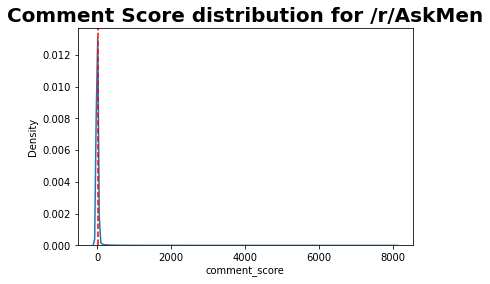

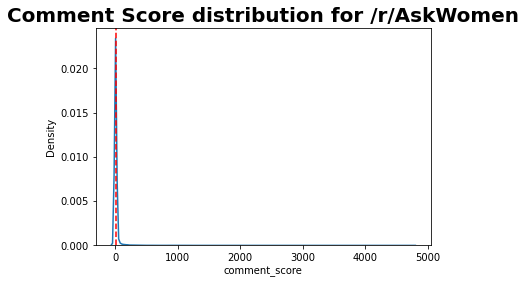

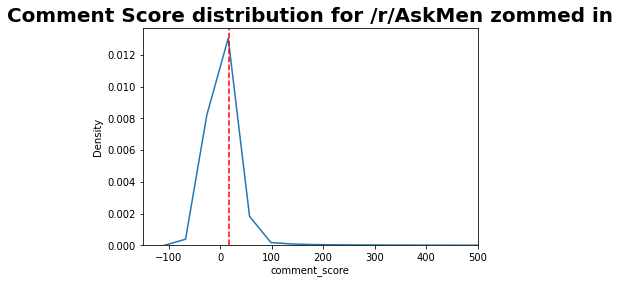

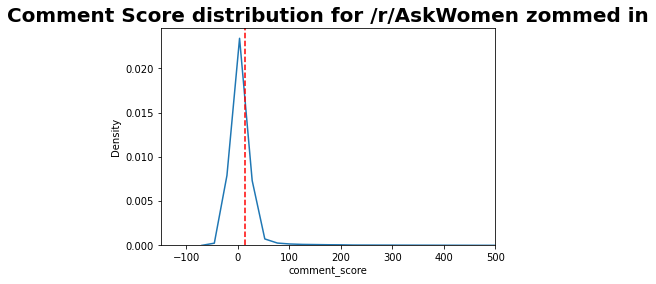

In [21]:
plot_1 = sns.kdeplot(data = men2.comment_score);
plot_1.axvline(men2.comment_score.mean(), color='r', linestyle='--')
plot_1.set_title("Comment Score distribution for /r/AskMen", fontsize=20, fontweight="bold")
plt.show();

plot_2 = sns.kdeplot(data = women2.comment_score);
plot_2.axvline(women2.comment_score.mean(), color='r', linestyle='--')
plot_2.set_title("Comment Score distribution for /r/AskWomen", fontsize=20, fontweight="bold")
plt.show();

plot_3 = sns.kdeplot(data = men2.comment_score);
plot_3.axvline(men2.comment_score.mean(), color='r', linestyle='--')
plot_3.set_title("Comment Score distribution for /r/AskMen zommed in", fontsize=20, fontweight="bold")
plot_3.set(xlim = (-150,500))
plt.show();

plot_4 = sns.kdeplot(data = women2.comment_score);
plot_4.axvline(women2.comment_score.mean(), color='r', linestyle='--')
plot_4.set_title("Comment Score distribution for /r/AskWomen zommed in", fontsize=20, fontweight="bold")
plot_4.set(xlim = (-150,500))
plt.show();

As we can see the comment score values seem to be heavily positively skewed because of the big values of the ouliers. The max comment score value for men is 8059 and women 4758 upvotes while their means are respectively equal to 17.725594 and 13.544593. Looking at the quantiles we could decide which values should we delete from our datasets.

In [22]:
quantiles_men = list()
quantiles_women = list()

for i in range(1, 100, 1):
    value_men = men2.comment_score.quantile(i/100)
    value_women = women2.comment_score.quantile(i/100)
    quantiles_men.append(value_men)
    quantiles_women.append(value_women)
    
quantiles_df = pd.DataFrame(data = {'quantile' : list(range(1,100,1)), 
                                    'men': quantiles_men, 
                                    'women': quantiles_women}).set_index('quantile')
quantiles_df.head(5)
quantiles_df.tail(5)


,men,women
quantile,,
1,-2.0,0.0
2,-1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0


,men,women
quantile,,
95,24.00,29.0
96,35.00,41.0
97,58.91,62.0
98,107.00,107.9
99,300.91,249.0


Looking at the quantiles in the dataframe above we decided to remove values that are bigger than 107 score because values for both men and women are very close to each other and both datasets will contain 98% of the observations. At the bottom we can see distributions plots of datasets with values less than 107 

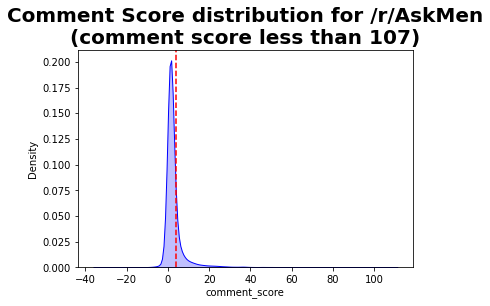

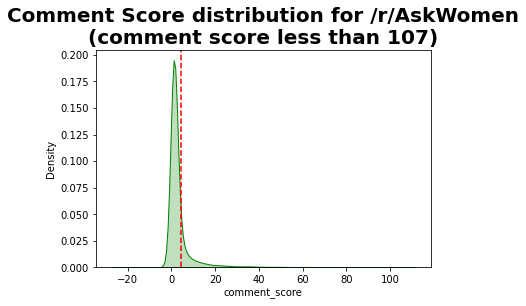

In [23]:
plot_5 = sns.kdeplot(data = men2.comment_score.loc[men.comment_score<=107], fill = True, color = "b");
plot_5.axvline(men2.comment_score.loc[men.comment_score<107].mean(), color='r', linestyle='--')
plot_5.set_title("Comment Score distribution for /r/AskMen\n(comment score less than 107)", fontsize=20, fontweight="bold")
plt.show();

plot_6 = sns.kdeplot(data = women2.comment_score.loc[women.comment_score<=107], fill = True, color = "g");
plot_6.axvline(women2.comment_score.loc[women.comment_score<=107].mean(), color='r', linestyle='--')
plot_6.set_title("Comment Score distribution for /r/AskWomen\n(comment score less than 107)", fontsize=20, fontweight="bold")
plt.show();

In [24]:
men2 = men2[men2.comment_score <= 107]
women2 = women2[women2.comment_score <= 107]

# Z-scoring 'comment_score' numerical variable

In [25]:
# Men
# Ungrouped
men2['zscore'] = zscore(men2['comment_score'], ddof = 0)

# Grouped by submission title
zscore_men_grouped = men2.groupby(['submission_title']).comment_score.transform(lambda x : zscore(x , ddof = 0))
men2['zscore_grouped'] = zscore_men_grouped # adding zscored comment_score to

In [26]:
# Women
# Ungrouped
women2['zscore'] = zscore(women2['comment_score'], ddof = 0)

# Grouped by submission title
zscore_women_grouped = women2.groupby(['submission_title']).comment_score.transform(lambda x : zscore(x , ddof = 0))
women2['zscore_grouped'] = zscore_women_grouped # adding zscored comment_score to

# MINMAX scaling of variable 'comment_score'

It might prove useful to have comment_score variable rescaled to the values between -1 to 1 in the next step of analyzing this data set thus according rescaled variables are created below for men and women datasets. It will be rescaled according to the min-max normalization. 

$$x' = \frac{x - min(x)}{max(x) - min(x)}$$

To rescale a values between arbitraty set of values $[a,b]$ we use the following formula:

$$x' = a + \frac{(x - min(x))(b - a)}{max(x) - min(x)}$$

There are two

In [31]:
men2.comment_score.min()
men2.comment_score.max()
women2.comment_score.min()
women2.comment_score.max()


-32

107

-23

107

In [28]:
# Men
# Ungrouped data
nominator_men = men2.comment_score - men2.comment_score.min()
denominator_men = men2.comment_score.max() - men2.comment_score.min()
# minmax_men = nominator_men / denominator_men # for [0,1] interval
minmax_men = -1 +  nominator_men * (1 - (-1)) / denominator_men

minmax_men
minmax_men.min()
minmax_men.max()

# Grouped data by submission title
min_grouped = men2.groupby(['submission_title']).comment_score.transform('min')
max_grouped = men2.groupby(['submission_title']).comment_score.transform('max')
nominator_men = men2.comment_score - min_grouped
denominator_men = max_grouped - min_grouped
# minmax_men_grouped = nominator_men / denominator_men # for [0,1] interval
minmax_men_grouped = -1 +  nominator_men * (1 - (-1)) / denominator_men

minmax_men_grouped
minmax_men_grouped.min()
minmax_men_grouped.max()

men2['minmax'] = minmax_men
men2['minmax_grouped'] = minmax_men_grouped

10       0.093525
15       0.323741
18       0.697842
19       0.597122
20      -0.381295
           ...   
17275   -0.496403
17276   -0.496403
17277   -0.496403
17278   -0.410072
17279   -0.525180
Name: comment_score, Length: 16664, dtype: float64

-1.0

1.0

10       0.080000
15       0.400000
18       0.920000
19       0.780000
20      -0.580000
           ...   
17275   -0.666667
17276   -0.666667
17277   -0.666667
17278    0.333333
17279   -1.000000
Name: comment_score, Length: 16664, dtype: float64

-1.0

1.0

In [29]:
# Women
# Ungrouped data
nominator_women = women2.comment_score - women2.comment_score.min()
denominator_women = women2.comment_score.max() - women2.comment_score.min()
# minmax_women = nominator_women / denominator_women # for [0,1] interval
minmax_women = -1 +  nominator_women * (1 - (-1)) / denominator_women

minmax_women
minmax_women.min()
minmax_women.max()

# Grouped data by submission title
min_grouped = women2.groupby(['submission_title']).comment_score.transform('min')
max_grouped = women2.groupby(['submission_title']).comment_score.transform('max')
nominator_women = women2.comment_score - min_grouped
denominator_women = max_grouped - min_grouped
# minmax_women_grouped = nominator_women / denominator_women # for [0,1] interval
minmax_women_grouped = -1 +  nominator_women * (1 - (-1)) / denominator_women

minmax_women_grouped
minmax_women_grouped.min()
minmax_women_grouped.max()

women2['minmax'] = minmax_women
women2['minmax_grouped'] = minmax_women_grouped

0       -0.215385
1       -0.400000
2       -0.415385
3       -0.446154
4       -0.461538
           ...   
16844   -0.630769
16849   -0.630769
16850   -0.630769
16852   -0.630769
16854   -0.630769
Name: comment_score, Length: 15097, dtype: float64

-1.0

1.0

0        1.000000
1        0.142857
2        0.071429
3       -0.071429
4       -0.142857
           ...   
16844   -0.940000
16849   -0.940000
16850   -0.940000
16852   -0.940000
16854   -0.940000
Name: comment_score, Length: 15097, dtype: float64

-1.0

1.0

# Saving final datasets

In [30]:
men2.to_csv('./data/final_askmen.csv', sep = ';', encoding = "utf-8", index = None, header = True)
women2.to_csv('./data/final_askwomen.csv', sep = ';', encoding = "utf-8", index = None, header = True)